## Data Storage. HW2. Основные операторы PostgreSQL

### 1. Создать таблицы со следующими структурами и загрузить данные из csv-файлов

> Дано два csv-файла с данными о клиентах (customer.csv) и их транзакциях (transaction.csv).
> Необходимо создать таблицы со следующими структурами и загрузить данные из csv-файлов.

#### Данные таблиц

![image](images/1.1.png)

![image](images/1.2.png)

Описание таблицы customer:

| Поле                   | Описание                 |
|------------------------|-------------------------|
| `customer_id`         | id клиента              |
| `first_name`         | имя клиента             |
| `last_name`         | фамилия клиента         |
| `gender`            | пол                     |
| `DOB`               | дата рождения           |
| `job_title`         | профессия               |
| `job_industry_category` | сфера деятельности    |
| `wealth_segment`    | сегмент благосостояния   |
| `deceased_indicator` | флаг актуального клиента |
| `owns_car`          | флаг наличия автомобиля  |
| `address`           | адрес проживания        |
| `postcode`         | почтовый индекс         |
| `state`            | штаты                   |
| `country`          | страна проживания       |
| `property_valuation` | оценка имущества       |


Описание таблицы transaction:

| Поле               | Описание              |
|--------------------|----------------------|
| `transaction_id`  | id транзакции        |
| `product_id`      | id продукта          |
| `customer_id`     | id клиента           |
| `transaction_date` | дата транзакции     |
| `online_order`    | флаг онлайн-заказа   |
| `order_status`    | статус транзакции    |
| `brand`          | бренд                |
| `product_line`   | линейка продуктов    |
| `product_class`  | класс продукта       |
| `product_size`   | размер продукта      |
| `list_price`     | цена                 |
| `standard_cost`  | стандартная стоимость |

```SQL

-- Создаём таблицы для загрузки файлов `customer.csv` и `transaction.csv`
-- Приводим в соответствие со скриншотами

CREATE TABLE customers (
    customer_id             INT          PRIMARY KEY,
    first_name              VARCHAR(50),
    last_name               VARCHAR(50),
    gender                  VARCHAR(30),
    dob                     VARCHAR(50),
    job_title               VARCHAR(50),
    job_industry_category   VARCHAR(50),
    wealth_segment          VARCHAR(50),
    deceased_indicator      VARCHAR(50),
    owns_car                VARCHAR(30),
    address                 VARCHAR(50),
    postcode                VARCHAR(30),
    state                   VARCHAR(30),
    country                 VARCHAR(30),
    property_valuation      INT
);


CREATE TABLE transactions (
    transaction_id      INT          PRIMARY KEY,
    product_id          INT,
    customer_id         INT,
    transaction_date    VARCHAR(30),
    online_order        BOOLEAN,
    order_status        VARCHAR(30),
    brand               VARCHAR(30),
    product_line        VARCHAR(30),
    product_class       VARCHAR(30),
    product_size        VARCHAR(30), 
    list_price          NUMERIC(10, 2), 
    standard_cost       NUMERIC(10, 2)
);
```

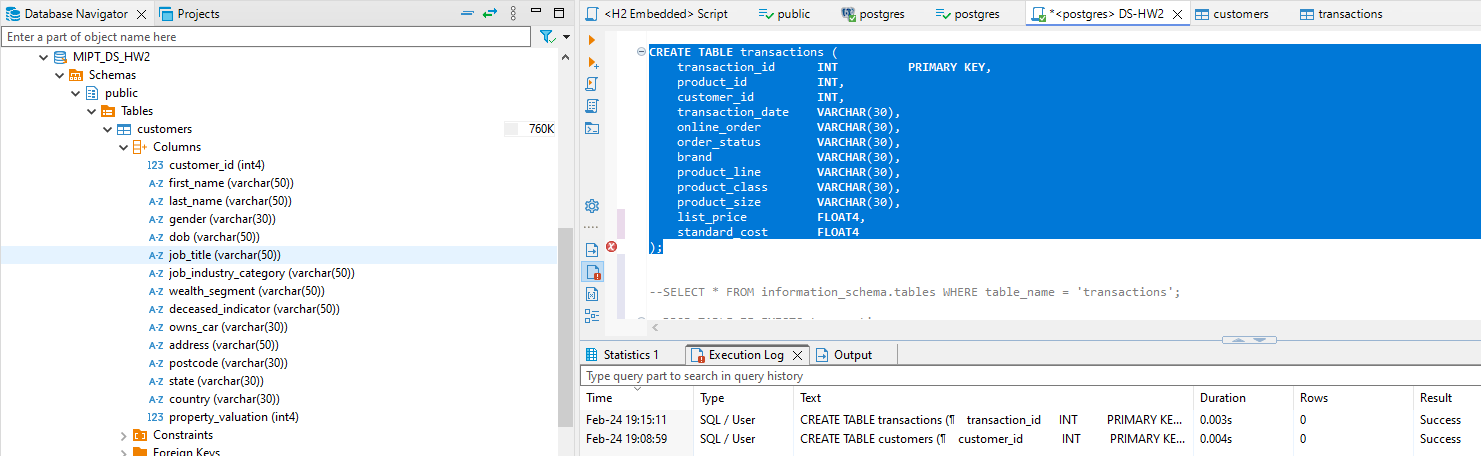

### 2.1. Вывести все уникальные бренды, у которых стандартная стоимость выше 1500 долларов

```SQL
SELECT DISTINCT brand
FROM transactions
WHERE standard_cost > 1500;
```

![image](images/2.1.png)

### 2.2. Вывести все подтвержденные транзакции за период '2017-04-01' по '2017-04-09' включительно

```SQL
SELECT *
FROM transactions
WHERE order_status = 'Approved'
  AND transaction_date BETWEEN '2017-04-01' AND '2017-04-09';
```

![image](images/2.2.png)

### 2.3. Вывести все профессии у клиентов из сферы IT или Financial Services, которые начинаются с фразы 'Senior'

```SQL
SELECT DISTINCT job_title
FROM customers
WHERE job_industry_category IN ('IT', 'Financial Services')
  AND job_title LIKE 'Senior%';
```

![image](images/2.3.png)

### 2.4. Вывести все бренды, которые закупают клиенты, работающие в сфере Financial Services

```SQL
SELECT DISTINCT t.brand
FROM customers AS c
JOIN transactions AS t ON c.customer_id = t.customer_id
WHERE c.job_industry_category = 'Financial Services' 
  AND t.brand IS NOT NULL AND t.brand != ''; -- убираем пустые значения
```

![image](images/2.4.png)

### 2.5. Вывести 10 клиентов, которые оформили онлайн-заказ продукции из брендов 'Giant Bicycles', 'Norco Bicycles', 'Trek Bicycles'

```SQL
SELECT DISTINCT c.customer_id, c.first_name, c.last_name
FROM customers AS c
JOIN transactions AS t ON c.customer_id = t.customer_id
WHERE t.online_order = true
  AND t.brand IN ('Giant Bicycles', 'Norco Bicycles', 'Trek Bicycles')
LIMIT 10;  -- показать первые 10 клиентов
```

![image](images/2.5.png)

### 2.6. Вывести всех клиентов, у которых нет транзакций

```SQL
SELECT c.customer_id, c.first_name, c.last_name
FROM customers AS c
LEFT JOIN transactions AS t ON c.customer_id = t.customer_id
WHERE t.transaction_id IS NULL;
```

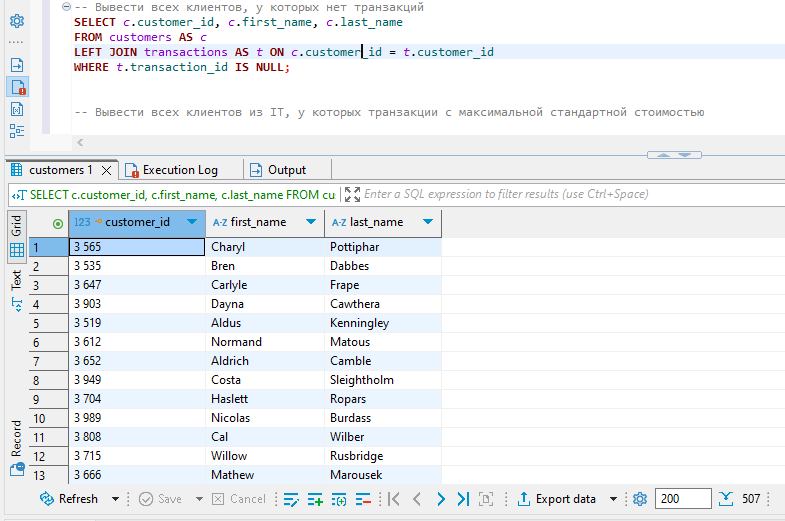

### 2.7. Вывести всех клиентов из IT, у которых транзакции с максимальной стандартной стоимостью

```SQL
SELECT DISTINCT c.customer_id, c.first_name, c.last_name,
                t.transaction_id, t.standard_cost
FROM customers AS c
JOIN transactions AS t ON c.customer_id = t.customer_id

WHERE c.job_industry_category = 'IT'
  -- находим максимальную standart_cost
  AND t.standard_cost = (SELECT MAX(standard_cost) FROM transactions);
```

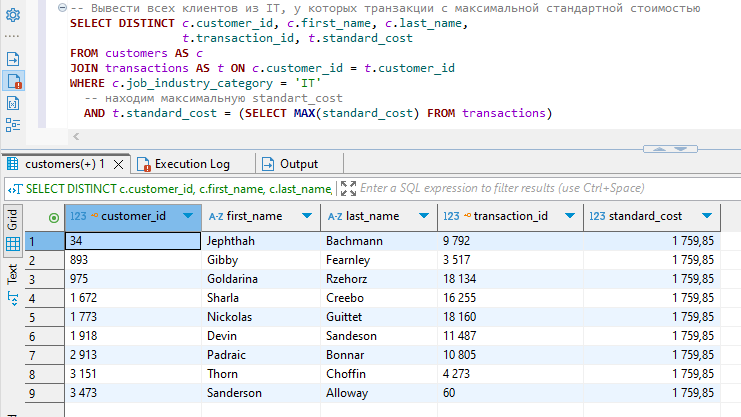

### 2.8. Вывести всех клиентов из сферы IT и Health, у которых есть подтвержденные транзакции за период '2017-07-07' по '2017-07-17'

```SQL
SELECT DISTINCT c.customer_id, c.first_name, c.last_name,
                t.transaction_date
FROM customers AS c
JOIN transactions AS t ON c.customer_id = t.customer_id

WHERE c.job_industry_category IN ('IT', 'Health')
  AND t.order_status = 'Approved'
  AND t.transaction_date BETWEEN '2017-07-07' AND '2017-07-17'
  
ORDER BY transaction_date;
```

![image.png](attachment:image.png)